# **Forecasting**

## Import Libraries and Dependencies

In [1]:
#Import your libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
import numpy as np
from MCForecastTools import MCSimulation


%matplotlib inline

## Import Stock Portfolio Data

In [2]:
total_portfolio = pd.read_csv('../../Resources/Stock_Portfolio_Prices.csv', index_col = 'Date', parse_dates = True, infer_datetime_format = True)

total_portfolio.tail(10)

,AAPL,FB,NVDA,PYPL,SHOP,SQ,TDOC,TSLA,TWTR,Z
Date,,,,,,,,,,
2021-06-07,125.90,336.58,704.60,260.60,1230.55,216.95,151.95,605.13,59.63,112.57
2021-06-08,126.74,333.68,698.12,263.15,1230.74,214.12,152.93,603.59,58.81,113.08
2021-06-09,127.13,330.25,694.33,263.60,1215.56,210.21,150.43,598.78,59.71,111.40
2021-06-10,126.11,332.46,697.00,269.47,1231.10,217.14,154.29,610.12,60.30,109.13
2021-06-11,127.35,331.26,713.01,271.45,1247.02,219.34,154.82,609.89,60.50,110.84
2021-06-14,130.48,336.77,720.75,274.93,1306.64,230.95,157.48,617.69,60.83,113.58
2021-06-15,129.64,336.75,711.54,271.89,1321.08,227.75,152.43,599.36,60.23,109.28
2021-06-16,130.15,331.08,712.41,268.82,1366.30,225.11,151.73,604.87,59.93,108.89
2021-06-17,131.79,336.51,746.29,278.11,1449.27,236.13,155.80,616.60,60.71,112.74


In [3]:
#Add a second header to your portfolio dataframe
total_portfolio.columns = pd.MultiIndex.from_tuples(
    zip(total_portfolio.columns, ['close','close', 'close','close', 'close','close', 'close','close', 'close','close']
        ))

total_portfolio.head()

,AAPL,FB,NVDA,PYPL,SHOP,SQ,TDOC,TSLA,TWTR,Z
,close,close,close,close,close,close,close,close,close,close
Date,,,,,,,,,,
2016-01-04,24.32,102.22,31.65,34.75,25.72,12.16,17.99,44.68,22.56,22.11
2016-01-05,23.71,102.73,32.16,34.31,25.31,11.51,19.50,44.69,21.92,21.99
2016-01-06,23.25,102.97,30.83,33.98,25.30,11.52,20.66,43.81,21.39,21.96
2016-01-07,22.27,97.92,29.61,33.13,24.67,11.16,20.18,43.13,20.26,21.50
2016-01-08,22.39,97.33,28.97,32.69,24.93,11.31,19.17,42.20,19.98,22.10


## Simulate One Year Forecasting

In [4]:
 # Configure a Monte Carlo simulation to forecast one year of cumulative returns for your portfolio
MC_even_dist = MCSimulation(
    portfolio_data = total_portfolio,
    weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    num_simulation = 1000,
    num_trading_days = 252
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

AAPL                   FB                NVDA               \
            close daily_return   close daily_return  close daily_return   
Date                                                                      
2016-01-04  24.32          NaN  102.22          NaN  31.65          NaN   
2016-01-05  23.71    -0.025082  102.73     0.004989  32.16     0.016114   
2016-01-06  23.25    -0.019401  102.97     0.002336  30.83    -0.041356   
2016-01-07  22.27    -0.042151   97.92    -0.049043  29.61    -0.039572   
2016-01-08  22.39     0.005388   97.33    -0.006025  28.97    -0.021614   

             PYPL                SHOP                  SQ                TDOC  \
            close daily_return  close daily_return  close daily_return  close   
Date                                                                            
2016-01-04  34.75          NaN  25.72          NaN  12.16          NaN  17.99   
2016-01-05  34.31    -0.012662  25.31    -0.015941  11.51    -0.053454  19.50   
2016-01-06  33.98    -0.009618  25.30    -0.000395  11.52     0.000869  20.66   
2016-01-07  33.13    -0.025015  24.67    -0.024901  11.16    -0.031250  20.18   
2016-01-08  32.69    -0.013281  24.93     0.010539  11.31     0.013441  19.17   

                          TSLA                TWTR                   Z  \
           daily_return  close daily_return  close daily_return  close   
Date                                                                     
2016-01-04          NaN  44.68          NaN  22.56          NaN  22.11   
2016-01-05     0.083936  44.69     0.000224  21.92    -0.028369  21.99   
2016-01-06     0.059487  43.81    -0.019691  21.39    -0.024179  21.96   
2016-01-07    -0.023233  43.13    -0.015522  20.26    -0.052828  21.50   
2016-01-08    -0.050050  42.20    -0.021563  19.98    -0.013820  22.10   

                         
           daily_return  
Date                     
2016-01-04          NaN  
2016-01-05    -0.005427  
2016-01-06    -0.001364  
2016-01-07    -0.020947  
2016-01-08     0.027907

In [5]:
# Run a Monte Carlo simulation to forecast one year of cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999004,1.000540,1.005073,1.007647,1.012705,0.996362,1.004359,1.008562,1.004826,1.006942,...,0.986889,0.995377,0.998280,1.019637,0.981330,0.999270,1.008993,1.001861,1.003592,1.006176
2,1.000563,0.998531,1.005795,1.024895,1.015784,0.983060,1.018240,1.026958,1.029940,1.015998,...,0.979244,1.004402,1.013249,1.012550,0.977629,0.995965,1.014633,0.997660,1.006054,1.009913
3,1.000594,0.987781,1.005350,1.025721,1.007275,0.982590,1.017415,1.020844,1.032480,0.999855,...,0.964654,0.996593,1.015547,1.006535,0.989232,0.996523,1.022378,1.011688,1.018460,1.013520
4,0.993546,0.975752,1.008998,1.020542,1.018398,0.975954,1.011510,1.024566,1.036443,1.006148,...,0.992644,0.998781,1.006187,1.009033,1.002363,0.999620,1.030035,1.005934,1.036821,1.005425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.584603,1.619456,1.471701,1.657448,1.415049,1.235484,1.931814,1.765595,2.015495,1.618349,...,1.666125,1.844703,1.860942,1.892025,1.726761,1.329485,1.732913,1.636015,1.600012,1.586080
249,1.601746,1.623078,1.488295,1.656494,1.437311,1.224935,1.967942,1.782134,2.018453,1.600909,...,1.692556,1.846559,1.894183,1.890231,1.731902,1.353389,1.735316,1.630744,1.593238,1.584015
250,1.597052,1.623463,1.468032,1.668209,1.438471,1.236419,1.989848,1.815666,1.973858,1.591840,...,1.659817,1.850674,1.898394,1.882976,1.742144,1.351117,1.726068,1.643949,1.608594,1.573704
251,1.583608,1.645215,1.465512,1.682160,1.456852,1.241828,1.966975,1.808290,1.980364,1.581796,...,1.657582,1.873186,1.925504,1.885490,1.754164,1.354537,1.710317,1.623705,1.591807,1.605106


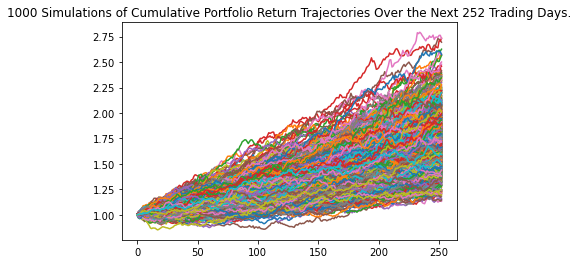

In [6]:
line_plot = MC_even_dist.plot_simulation()

In [7]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               1.724034
std                0.259439
min                1.133829
25%                1.548691
50%                1.694175
75%                1.882812
max                2.733411
95% CI Lower       1.291409
95% CI Upper       2.328213
Name: 252, dtype: float64


In [8]:
type(MC_even_dist)

MCForecastTools.MCSimulation